In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import re

from insightface.app import FaceAnalysis

In [2]:
# Configure face analysis
faceapp = FaceAnalysis(name="buffalo_l",
                     root="insightface_model",
                    providers=['CPUExecutionProvider'])
faceapp.prepare(ctx_id=0, det_size=(640, 640), det_thresh=0.5)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [3]:
def clean_name(string):
    # remove all special characters
    return re.sub(r'[^A-Za-z]',' ',string).title()

In [4]:
## Extract facial features and labels
person_info = []
listdir = os.listdir(path="images")
for folder_name in listdir:
    role, name = folder_name.split("-")
    name = clean_name(name)
    role = clean_name(role)
    # path of each image in respective folder
    img_files = os.listdir(path=f"images/{folder_name}")
    for file in img_files:
        path = f"./images/{folder_name}/{file}"
        # read the image
        img_arr = cv2.imread(path)
        # get facial analysis info
        result = faceapp.get(img_arr,max_num=1)
        if len(result) > 0:
            # extract facial embeddings
            res = result[0]
            embedding = res['embedding']
            # save all info like name, role, # extract facial embeddings in a list
            person_info.append([name,role,embedding])

c:\Users\onyek\Documents\PROJECTS\face_rec_attendance_system\.venv\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [5]:
df = pd.DataFrame(person_info,columns=['name','role','facial_features'])
df

,name,role,facial_features
0,Angelina Jolie,Student,"[0.078243345, 1.9015106, -0.023396477, -0.9335..."
1,Angelina Jolie,Student,"[0.23105192, 0.97989666, -0.7245345, -0.320673..."
2,Angelina Jolie,Student,"[0.07103489, 2.1639588, -0.34098446, -0.747323..."
3,Angelina Jolie,Student,"[0.48551857, 2.1145895, 0.44635534, -0.6645850..."
4,Angelina Jolie,Student,"[-0.088235155, 1.5141311, -0.18750492, -1.3423..."
5,Angelina Jolie,Student,"[-0.54578054, 1.5319035, -0.12923726, -1.15202..."
6,Angelina Jolie,Student,"[0.9446981, 1.6263458, -0.25197563, -1.4123578..."
7,Angelina Jolie,Student,"[0.42334646, 0.3340376, 0.120368496, 0.0760046..."
8,Angelina Jolie,Student,"[-0.36375725, 1.3726236, 0.06761655, -0.857598..."
9,Angelina Jolie,Student,"[0.75207204, 1.2098383, 0.04370375, -1.4506807..."


## Inference

### read image

In [7]:
# read test image
img_test = cv2.imread("test_images/test_2.jpeg")
cv2.imshow('test image',img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

### extract feature

In [11]:
res_test = faceapp.get(img_test,max_num=0)
for i,rt in enumerate(res_test):
    print(f"current loop: {i}")
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']

current loop= 0


In [12]:
# consider only one sample
len(embed_test)

512

In [13]:
df.head()

,name,role,facial_features
0,Angelina Jolie,Student,"[0.078243345, 1.9015106, -0.023396477, -0.9335..."
1,Angelina Jolie,Student,"[0.23105192, 0.97989666, -0.7245345, -0.320673..."
2,Angelina Jolie,Student,"[0.07103489, 2.1639588, -0.34098446, -0.747323..."
3,Angelina Jolie,Student,"[0.48551857, 2.1145895, 0.44635534, -0.6645850..."
4,Angelina Jolie,Student,"[-0.088235155, 1.5141311, -0.18750492, -1.3423..."


In [15]:
X_list = df['facial_features'].tolist()
X = np.asarray(X_list)

In [16]:
X.shape

(50, 512)

In [17]:
from sklearn.metrics import pairwise

In [19]:
embed_test.shape

(512,)

In [21]:
embed_test.reshape(1,-1).shape

(1, 512)

In [22]:
y = embed_test.reshape(1,-1)

euclidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similarity = pairwise.cosine_similarity(X,y)

In [26]:
data_search = df.copy()
data_search['euclidean_distance'] = euclidean_distance
data_search['manhattan_distance'] = manhattan_distance
data_search['cosine_similarity'] = cosine_similarity

In [27]:
data_search.head()

,name,role,facial_features,euclidean_distance,manhattan_distance,cosine_similarity
0,Angelina Jolie,Student,"[0.078243345, 1.9015106, -0.023396477, -0.9335...",29.976627,536.054703,-0.004487
1,Angelina Jolie,Student,"[0.23105192, 0.97989666, -0.7245345, -0.320673...",29.810110,543.882132,0.013862
2,Angelina Jolie,Student,"[0.07103489, 2.1639588, -0.34098446, -0.747323...",28.812088,512.476758,0.025873
3,Angelina Jolie,Student,"[0.48551857, 2.1145895, 0.44635534, -0.6645850...",29.295269,530.584236,0.031181
4,Angelina Jolie,Student,"[-0.088235155, 1.5141311, -0.18750492, -1.3423...",28.864431,516.796404,0.021957


In [28]:
import matplotlib.pyplot as plt

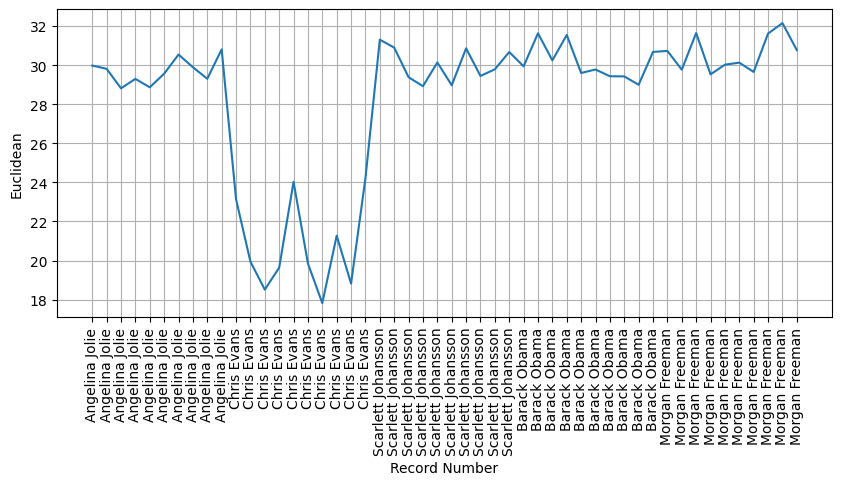

In [35]:
plt.figure(figsize=(10,4))
plt.plot(data_search["euclidean_distance"])
plt.xticks(ticks=list(range(len(data_search["euclidean_distance"]))),
           rotation=90,
           labels=data_search["name"])
plt.xlabel("Record Number")
plt.ylabel("Euclidean")
plt.grid()
plt.show()

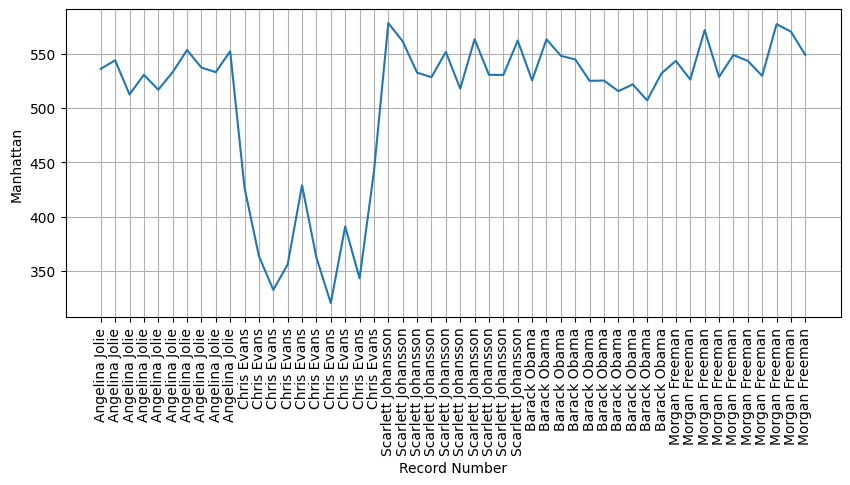

In [36]:
plt.figure(figsize=(10,4))
plt.plot(data_search["manhattan_distance"])
plt.xticks(ticks=list(range(len(data_search["manhattan_distance"]))),
           rotation=90,
           labels=data_search["name"])
plt.xlabel("Record Number")
plt.ylabel("Manhattan")
plt.grid()
plt.show()

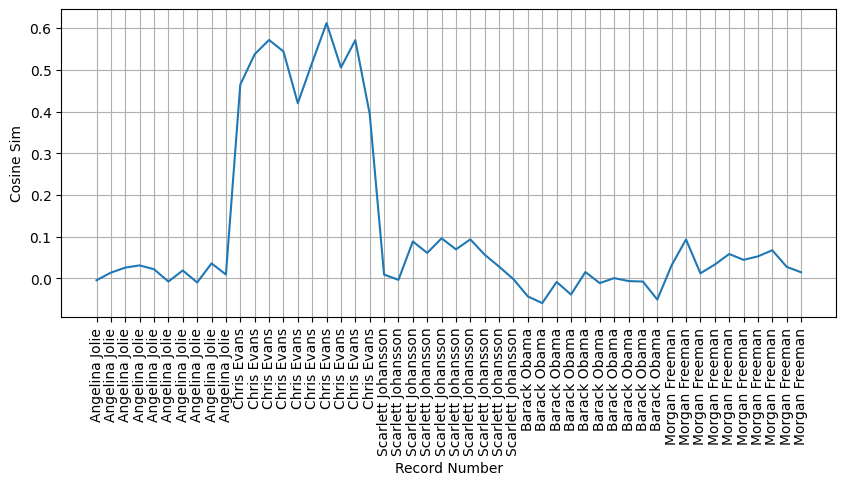

In [37]:
plt.figure(figsize=(10,4))
plt.plot(data_search["cosine_similarity"])
plt.xticks(ticks=list(range(len(data_search["cosine_similarity"]))),
           rotation=90,
           labels=data_search["name"])
plt.xlabel("Record Number")
plt.ylabel("Cosine Sim")
plt.grid()
plt.show()

### Identify the person name using Euclidean Distance

In [38]:
d_eq_optimal = 25

In [45]:
datafilter = data_search.query(f"euclidean_distance < {d_eq_optimal}")
datafilter.reset_index(drop=True,inplace=True)
if len(datafilter) > 0:
    argmin = datafilter["euclidean_distance"].argmin()
    name, role = datafilter.loc[argmin][["name", "role"]]
else:
    name = "Unknown"
    role = "Unknown"

In [46]:
print(name, role)

Chris Evans Student


### Identify the person name using Manhattan Distance

In [48]:
d_man_optimal = 450

datafilter = data_search.query(f"manhattan_distance < {d_man_optimal}")
datafilter.reset_index(drop=True,inplace=True)
if len(datafilter) > 0:
    argmin = datafilter["manhattan_distance"].argmin()
    name, role = datafilter.loc[argmin][["name", "role"]]
else:
    name = "Unknown"
    role = "Unknown"

print(name, role)

Chris Evans Student


### Identify the person name using Cosine Similiarity

In [49]:
S_opt = 0.5

datafilter = data_search.query(f"cosine_similarity > {S_opt}")
datafilter.reset_index(drop=True,inplace=True)
if len(datafilter) > 0:
    argmax = datafilter["cosine_similarity"].argmax()
    name, role = datafilter.loc[argmax][["name", "role"]]
else:
    name = "Unknown"
    role = "Unknown"

print(name, role)

Chris Evans Student


### Identify Multiple Persons in an Image

In [57]:
def ml_search_algo(df,feature_col,test_vec,name_role=['name','role'],thresh=0.5):
    """
    cosine similarity based search algorithm
    """
    # step-1: take the dataframe (collection of data)
    df = df.copy()
    # step-2: Index face embedding from the datraframe and convert to array
    X_list = df[feature_col].tolist()
    X = np.asarray(X_list)
    # step-3: calculate cosine similarity
    similar = pairwise.cosine_similarity(X,test_vec.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    df['cosine'] = similar_arr
    # step-4: filter the data
    data_filter = df.query(f"cosine >= {thresh}")
    if len(data_filter) > 0:
        # step-5: get the person name
        data_filter.reset_index(drop=True,inplace=True)
        data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]
    else:
        person_name = 'Unknown'
        person_role = 'Unknown'
    return person_name, person_role

In [70]:
# read test image
test_image = cv2.imread("test_images/test_7.jpeg")
# cv2.imshow('test image',test_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [71]:
# step-1: take the test image and apply to insight face
results = faceapp.get(test_image,max_num=0)
test_copy = test_image.copy()

# step-2: use for loop and extract each embedding and pass to ml_search_algo
for res in results:
    x1,y1,x2,y2 = res['bbox'].astype(int)
    score = int(res['det_score']*100)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algo(df,"facial_features",
                test_vec=embeddings,
                name_role=['name','role'])
    if person_name == 'Unknown':
        color = (0,0,255)
    else:
        color = (0,255,0)
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)
    cv2.putText(test_copy,person_name,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,color,2)
    
cv2.imshow("test image", test_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

c:\Users\onyek\Documents\PROJECTS\face_rec_attendance_system\.venv\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


### Compressing Dataset

In [72]:
df_compress = df.groupby(by=['name','role']).mean()
df_compress.reset_index(inplace=True)
df_compress

,name,role,facial_features
0,Angelina Jolie,Student,"[0.19881923, 1.4748836, -0.097958915, -0.88050..."
1,Barack Obama,Teacher,"[-0.22177818, 1.5762168, -0.503078, 0.13601258..."
2,Chris Evans,Student,"[0.35691038, -0.4149104, 0.039218407, -0.15436..."
3,Morgan Freeman,Teacher,"[0.7627893, 0.89061487, 0.46873552, 0.2589808,..."
4,Scarlett Johansson,Student,"[-0.13535991, -0.28213844, -0.42700863, -0.282..."


### Convert dataframe into array and save in numpy zip format

In [74]:
xvalues = df_compress.values
col_name = np.array(df_compress.columns)
col_name

array(['name', 'role', 'facial_features'], dtype=object)

In [75]:
np.savez('dataframe_students_teacher.npz',xvalues,col_name)

In [78]:
## load numpy zip
numpy_file = np.load('dataframe_students_teacher.npz',allow_pickle=True)
numpy_file.files

['arr_0', 'arr_1']

In [82]:
pd.DataFrame(numpy_file['arr_0'],columns=numpy_file['arr_1'])

,name,role,facial_features
0,Angelina Jolie,Student,"[0.19881923, 1.4748836, -0.097958915, -0.88050..."
1,Barack Obama,Teacher,"[-0.22177818, 1.5762168, -0.503078, 0.13601258..."
2,Chris Evans,Student,"[0.35691038, -0.4149104, 0.039218407, -0.15436..."
3,Morgan Freeman,Teacher,"[0.7627893, 0.89061487, 0.46873552, 0.2589808,..."
4,Scarlett Johansson,Student,"[-0.13535991, -0.28213844, -0.42700863, -0.282..."
